In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Spam_SMS_Collection.txt', sep='\t', names=['label', 'message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Exploratory Data Analysis

In [3]:
df.shape

(5572, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [5]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [6]:
df.dtypes

label      object
message    object
dtype: object

In [7]:
df.columns

Index(['label', 'message'], dtype='object')

In [8]:
df.describe(include='object')

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

*So there is no NAN values in the dataset*

In [10]:
# Mapping values for 'label'
df['label'] = df['label'].map({'ham':0,'spam':1})

In [11]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Data Visualization

Text(0.5, 1.0, 'Distribution of HAM and SPAM')

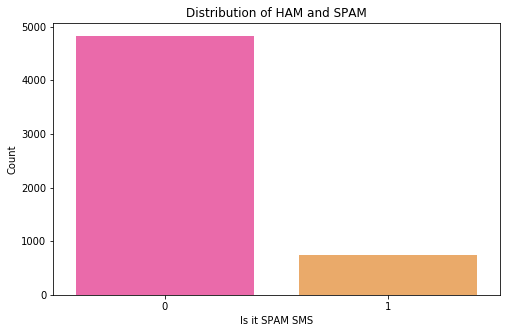

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x='label',data=df,palette='spring')
plt.xlabel('Is it SPAM SMS')
plt.ylabel('Count')
plt.title('Distribution of HAM and SPAM')

*From the Above oberservation, it is clearly defined that the dataset is Imbalanced*.

### Feature Engineering
- Handling Inbalanced Dataset using OverSampling
- Creating new features such as Word_Count,contains_currency_symbol,contains_numbers etc.

In [13]:
#Handling Inbalanced Dataset
only_spam = df[df['label']==1]

print('Number of spam records:{}'.format(only_spam.shape[0]))
print('Number of Ham records:{}'.format(df.shape[0]-only_spam.shape[0]))

Number of spam records:747
Number of Ham records:4825


In [14]:
count = int((df.shape[0]-only_spam.shape[0])/only_spam.shape[0])
for i in range(0,count-1):
    df = pd.concat([df,only_spam])
    
df.shape

(9307, 2)

Text(0.5, 1.0, 'Distribution of HAM vs SPAM')

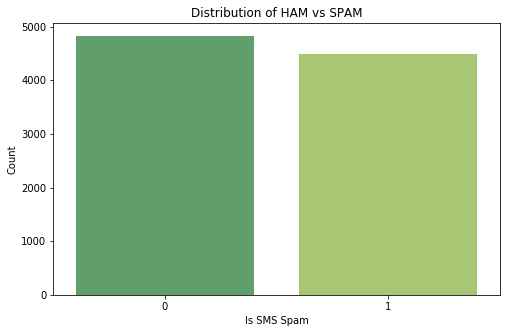

In [15]:
#Countplot for Spam vs Ham as Balanced Dataset
plt.figure(figsize=(8,5))
sns.countplot(x='label',data=df,palette='summer')
plt.xlabel('Is SMS Spam')
plt.ylabel('Count')
plt.title('Distribution of HAM vs SPAM')

In [16]:
#Creating new feature as word_count
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

In [17]:
df.head()

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13


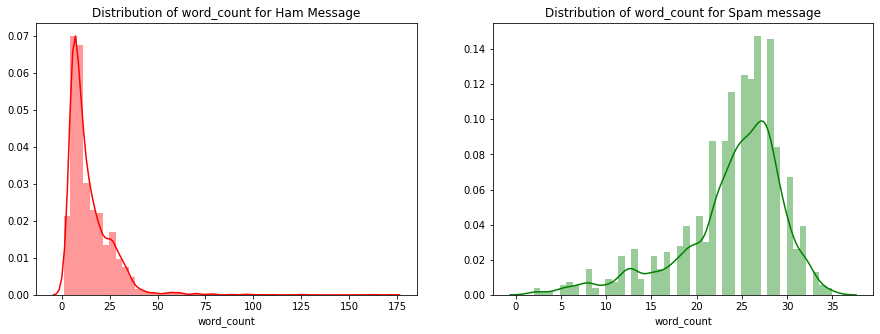

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=(15,5))

# 1-row, 2 column, go to the first subplot
plt.subplot(1,2,1)
g = sns.distplot(a=df[df['label']==0].word_count,color='red')
p = plt.title('Distribution of word_count for Ham Message')

#1-row, 2-column, go to the second subplot
plt.subplot(1,2,2)
g = sns.distplot(a=df[df['label']==1].word_count,color='green')
p = plt.title('Distribution of word_count for Spam message')

plt.show()
plt.tight_layout()

**Insight:** : **Spam Messages** *word count falls in the range of 10-30 words, where as* **Ham Messages** *word count fall in the range of 15-25 words*.

In [19]:
# Creating features containing currency symbol
def currency(x):
    currency_symbol = ['€', '$', '¥', '£', '₹']
    for i in currency_symbol:
        if i in x:
            return 1
    return 0
df['contains_currency_symbol'] = df['message'].apply(currency)

In [20]:
df.tail()

,label,message,word_count,contains_currency_symbol
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0
5567,1,This is the 2nd time we have tried 2 contact u...,30,1


In [21]:
df['contains_currency_symbol'].value_counts()

0    7746
1    1561
Name: contains_currency_symbol, dtype: int64

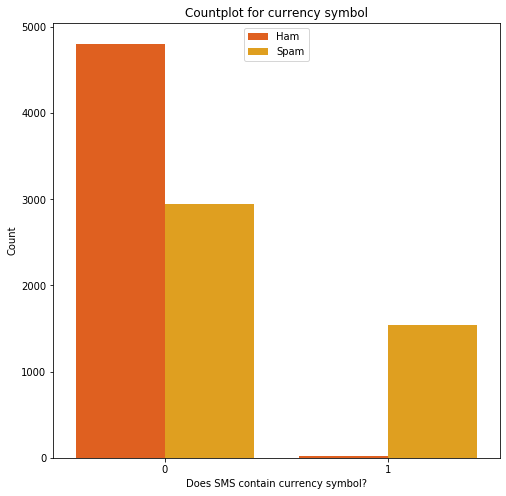

In [22]:
#Counplot for containing_currency_symbol
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_currency_symbol',data=df,hue='label',palette='autumn')
p = plt.title('Countplot for currency symbol')
p = plt.xlabel('Does SMS contain currency symbol?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham','Spam'],loc=9)

**Insight: Almost 1/3 of Spam messages contain currency symbols, and currency symbols are rarely used in Ham messages**.

In [23]:
#Creating feature contains_numbers
def numbers(x):
  for i in x:
    if ord(i)>=48 and ord(i)<=57:
      return 1
  return 0

df['contains_number'] = df['message'].apply(numbers)

In [24]:
df.head()

,label,message,word_count,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0


In [25]:
df['contains_number'].value_counts()

1    5003
0    4304
Name: contains_number, dtype: int64

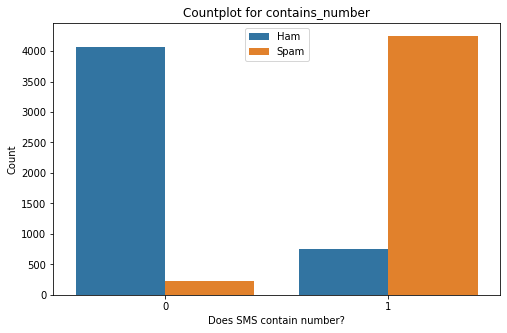

In [26]:
#Countplot for contains_number
plt.figure(figsize=(8,5))
g = sns.countplot(x='contains_number',data=df,hue='label')
p = plt.title('Countplot for contains_number')
p = plt.xlabel('Does SMS contain number?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham','Spam'],loc=9)

Insight: It is evident that most of the Spam messages contain numbers, and majority of the Ham messages donot contain numbers.

### Data Cleaning

- Removing special character and numbers using regular expression
- Converting the entire sms into lower case
- Tokenizing the sms by words
- Removing the stop words
- Lemmatizing the words
- Joining the lemmatized words
- Building a corpus of messages

In [27]:
#Importing essential libraries for performing NLP
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to C:\Users\swati
[nltk_data]     bansal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\swati
[nltk_data]     bansal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
# Cleaning the messages
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(df.message):
    #cleaning special characters from the sms
    message = re.sub(pattern='[^a-zA-Z]',repl=' ',string=sms_string)
    
    #Converting the entire sms into lowercase
    message = message.lower()
    
    #Tokenizing the sms by words
    words = message.split()
    
    #Removing the stop words
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    
    #Lemmatizing the words
    lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]
    
    #Joining the lemmatized words
    message = ' '.join(lemmatized_words)
    
    #Building a corpus of messages
    corpus.append(message)

In [42]:
corpus[0:5]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though']

In [43]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names()

#Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors,columns=feature_names)
y = df['label']

### Model Building & Evalution

- Multinomial Naive Bayes
- Decision Tree 
- Random Forest(Ensemble)
- Voting(Multinomial Navie Bayes + Decision Tree)

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
# Fitting the model with NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb,X,y,scoring='f1',cv=10)
print("----Average F1 score for MNB model: {}----".format(round(cv.mean(),3)))
print("Standard Deviation: {}".format(round(cv.std(),3)))

----Average F1 score for MNB model: 0.943----
Standard Deviation: 0.004


In [47]:
# Classification model for MNB model
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print("---Classification report for MNB model----")
print(classification_report(y_test,y_pred))

---Classification report for MNB model----
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       959
           1       0.94      0.94      0.94       903

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



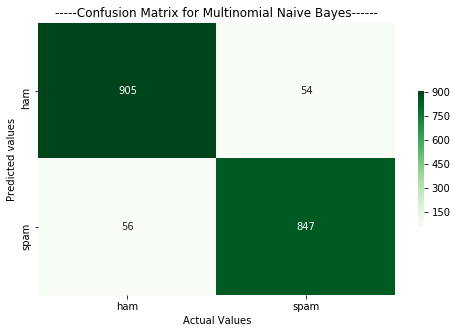

In [48]:
# Confusion Matrix for MNB model
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(8,5))
axis_labels =['ham','spam']
g = sns.heatmap(data=cm,annot=True,cmap='Greens',xticklabels=axis_labels,yticklabels=axis_labels,fmt='g',cbar_kws={'shrink':0.5})
p = plt.xlabel('Actual Values')
p = plt.ylabel('Predicted values')
p = plt.title('-----Confusion Matrix for Multinomial Naive Bayes------')

#### Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Decision Tree model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for Decision Tree model: 0.98 ---
Standard Deviation: 0.003


In [50]:
# Classfication report for Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

print('----Classification Report for Decision Tree model:----')
print(classification_report(y_test,dt_pred))

----Classification Report for Decision Tree model:----
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       959
           1       0.96      1.00      0.98       903

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



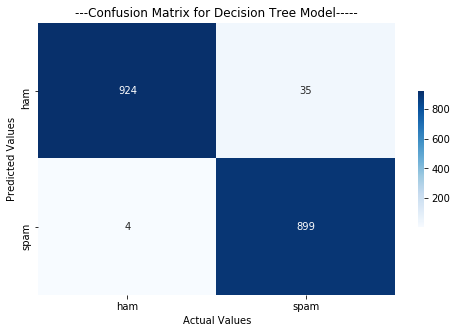

In [51]:
# Creating Confusion matrix for the Decision Tree Matrix
cm = confusion_matrix(y_test,dt_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham','spam']
g = sns.heatmap(data=cm,annot=True,cmap="Blues",xticklabels=axis_labels,yticklabels=axis_labels,fmt='g',cbar_kws={'shrink':0.5})

p = plt.xlabel('Actual Values')
p = plt.ylabel('Predicted Values')
p = plt.title('---Confusion Matrix for Decision Tree Model-----')

#### Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20)
cv = cross_val_score(rf,X,y,scoring='f1',cv=10)
print('------Average F1-Score for Random Forest Model:{}---'.format(round(cv.mean(),3)))
print('Standard Deviation: {}'.format(round(cv.std(),3)))

------Average F1-Score for Random Forest Model:0.995---
Standard Deviation: 0.003


In [53]:
# classification report for Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

print('---- Classification report for Random Forest Model--')
print(classification_report(y_test,y_pred))

---- Classification report for Random Forest Model--
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       959
           1       0.94      0.94      0.94       903

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



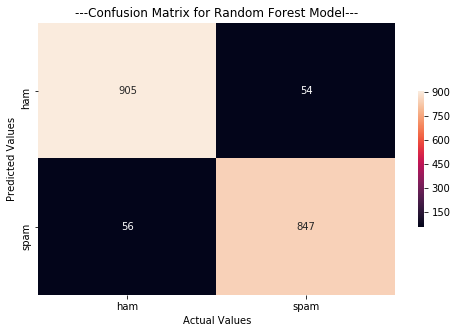

In [54]:
# Confusion Matrix for Random Forest Model
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham','spam']
g = sns.heatmap(data=cm,annot=True,xticklabels=axis_labels,yticklabels=axis_labels,fmt='g',cbar_kws={'shrink':0.5})
p = plt.title('---Confusion Matrix for Random Forest Model---')
p = plt.xlabel('Actual Values')
p = plt.ylabel('Predicted Values')

**Note**: *Decision Tree & MNB algorithms are selected and fed to Voting algorithm to increase the F1-Score*!

#### Voting Classifier

In [55]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier([('decision_tree',dt),('m_naive_bayes',mnb)], weights=[2,1])
cv = cross_val_score(vc,X,y,cv=10,scoring='f1')

print('---Average F1 score for Voting Classifer model: {}'.format(round(cv.mean(),3)))
print('Standard Deviation:{}'.format(round(cv.std(),3)))

---Average F1 score for Voting Classifer model: 0.98
Standard Deviation:0.004


**Note**: *Voting algorithm did not out-perform Random Forest algorithm, hence* **Random Forest algorithm is selected for predicting the results of this problem statement**.

### Making Predictions

In [56]:
def predict_spam(sample_message):
  sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  final_message = [wnl.lemmatize(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = tfidf.transform([final_message]).toarray()
  return rf.predict(temp)

#### Prediction 1:

In [57]:
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message.


#### Prediction 2

In [58]:
sample_message = 'Dear relieved of westonzoyland, all going to plan this end too!'

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a HAM(normal) message.')

This is a HAM(normal) message.


In [60]:
sample_message = 'Phony £350 award - Todays Voda numbers ending XXXX are selected to receive a £350 award. If you have a match please call 08712300220 quoting claim code 3100 standard rates app'

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM Message.')
else:
    print('This is a HAM(normal) message')

Gotcha! This is a SPAM Message.
